In [ ]:
# Import Libaries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn import set_config
from sklearn.utils import estimator_html_repr
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve, validation_curve

In [2]:
#  Load Dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv').copy()

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
data.shape

(7043, 21)

In [6]:
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
# Remove inefficient columns
data.drop('customerID', axis=1, inplace=True)

In [10]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')

In [11]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
data['Churn'] = data['Churn'].map({'Yes':1, 'No': 0})
data['SeniorCitizen'] = data['SeniorCitizen'].astype('category')
data['Churn'] = data['Churn'].astype('category')

In [13]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
data[data['TotalCharges'].isnull()].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [15]:
data[data['tenure'] == 0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [16]:
# Filling missing values
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
data.loc[data['tenure'] == 0, 'tenure'] = np.nan
imputer = IterativeImputer(random_state=42)
data[num_cols] = imputer.fit_transform(data[num_cols])

C:\Users\fab\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [17]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

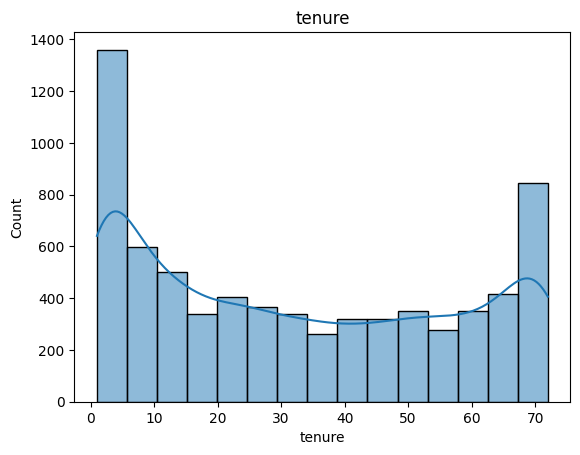

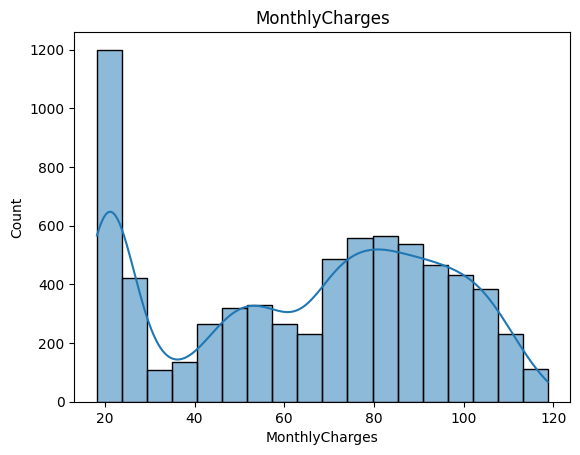

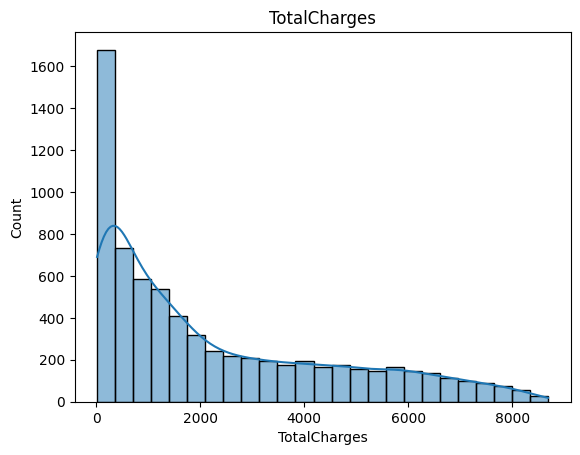

In [18]:
# Distribution of numeric columns
for col in num_cols:
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.show()

In [19]:
# Number of each category
churn_counts = data['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

# Replacing labels with Yes/No
churn_counts['Churn'] = churn_counts['Churn'].map({0: 'No', 1: 'Yes'})

# Pie chart
fig = px.pie(churn_counts, values='Count', names='Churn', title='Churn Distribution', hole=0.3)

fig.show()

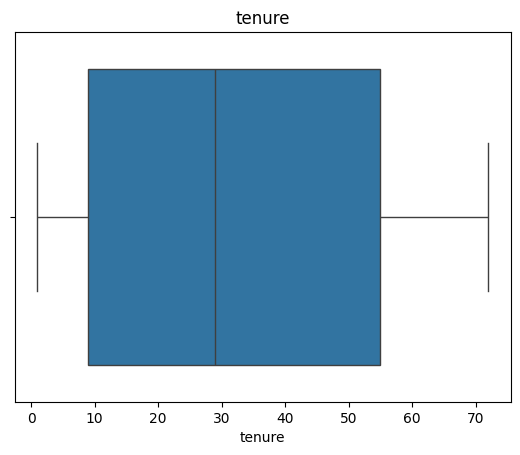

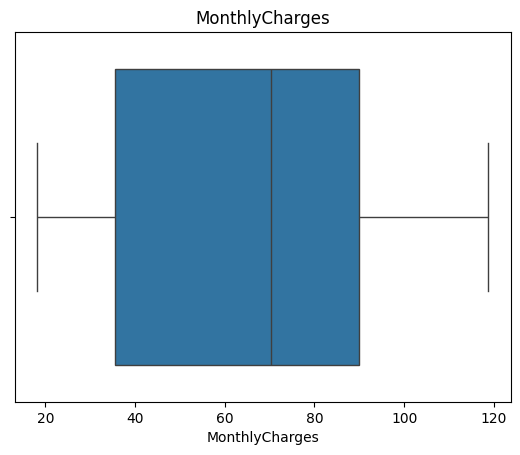

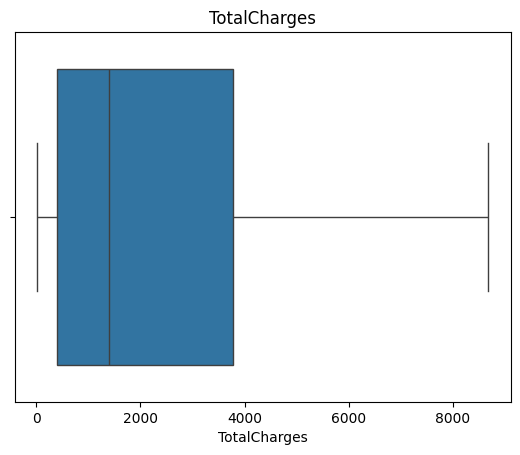

In [20]:
# Finding outliers of numerical columns
for col in num_cols:
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()

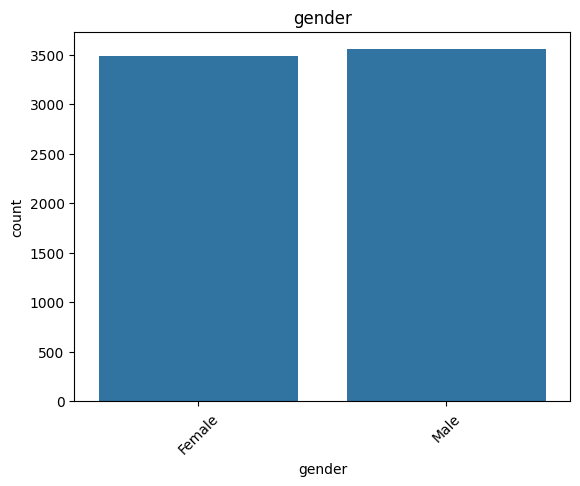

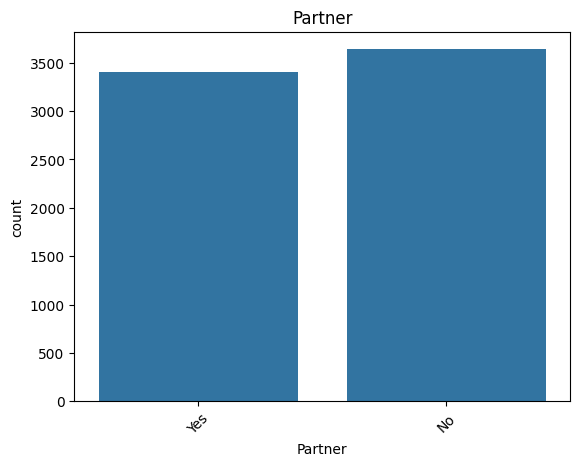

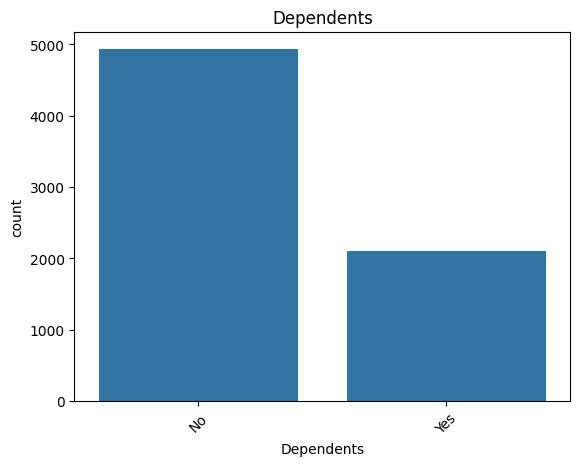

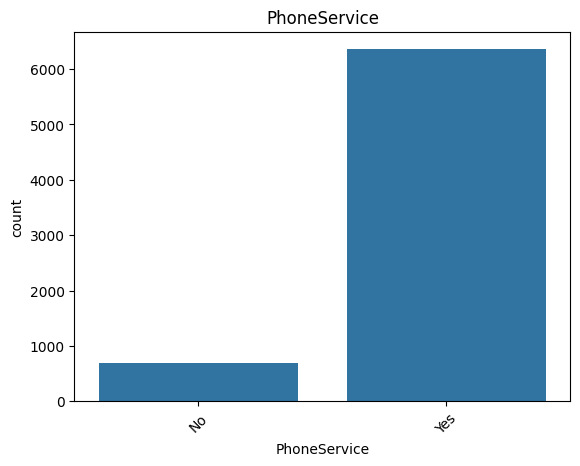

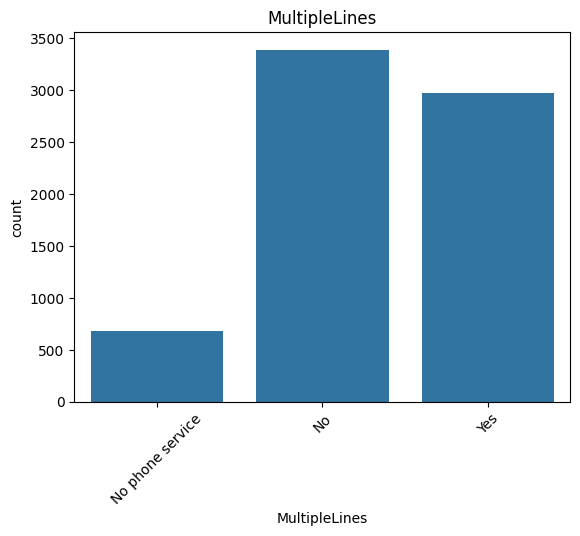

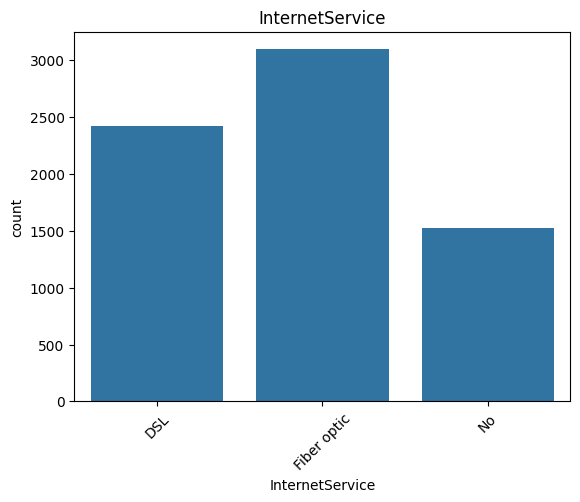

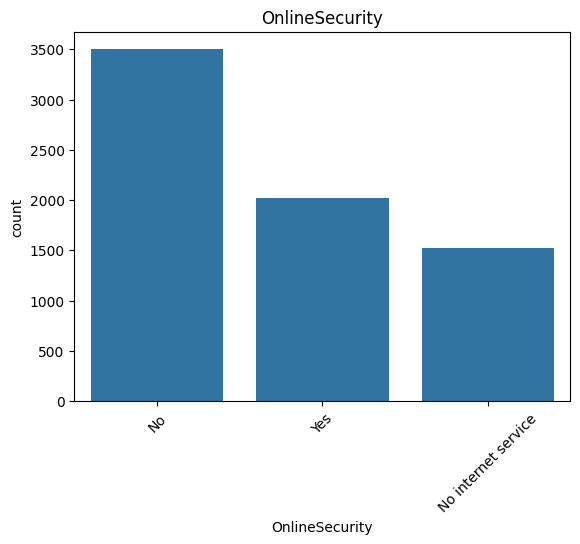

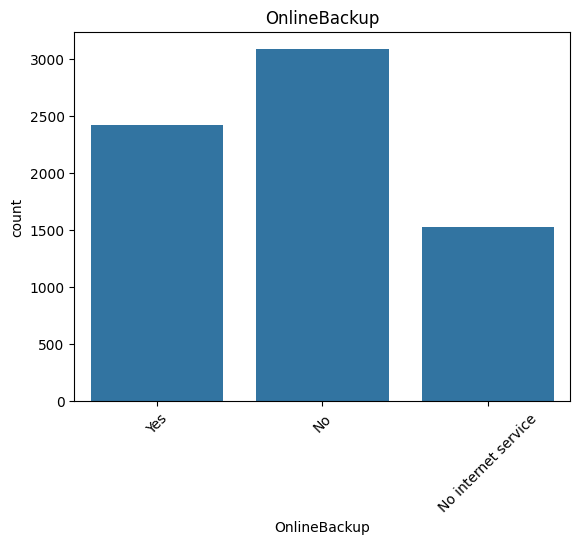

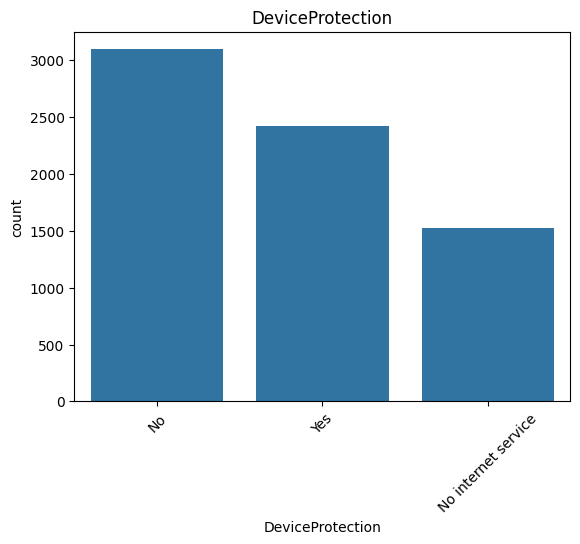

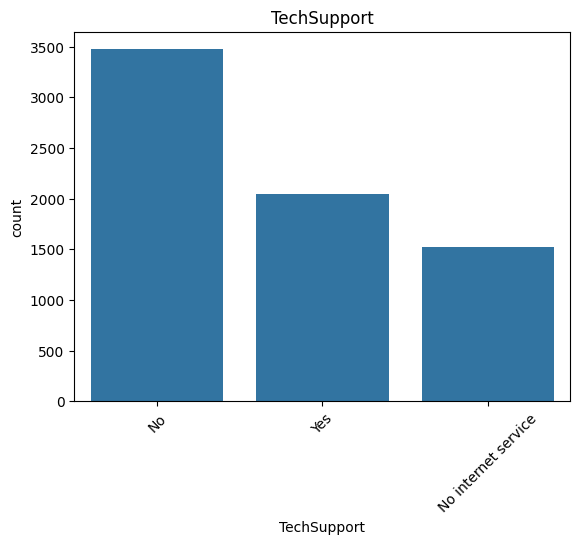

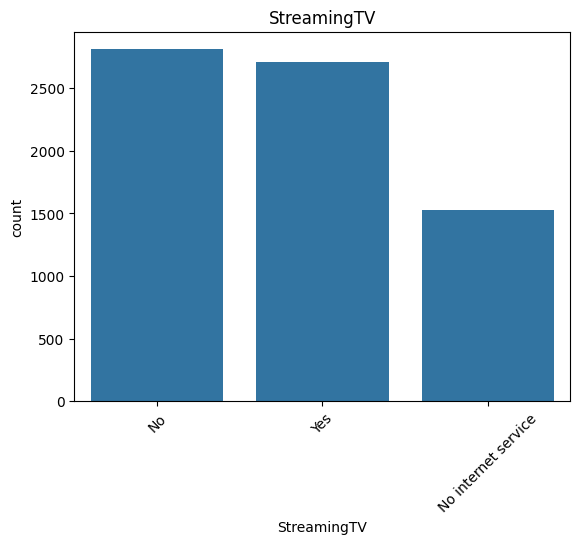

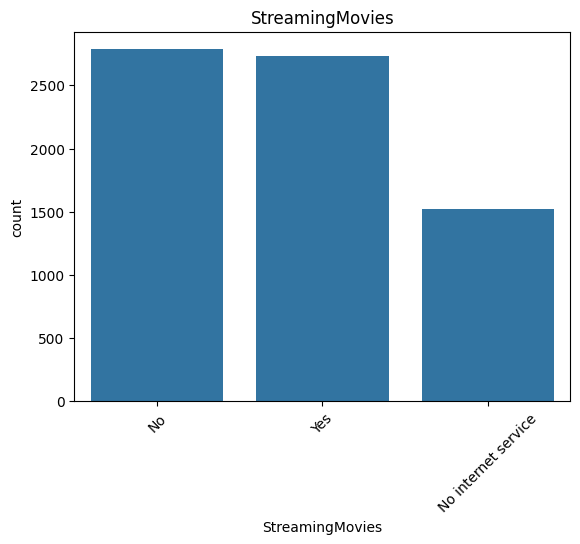

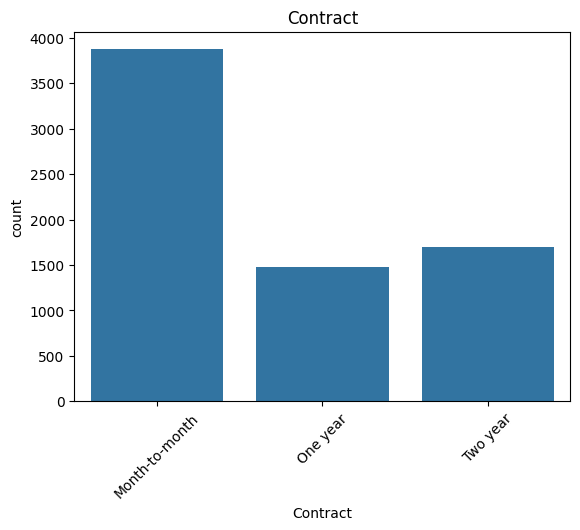

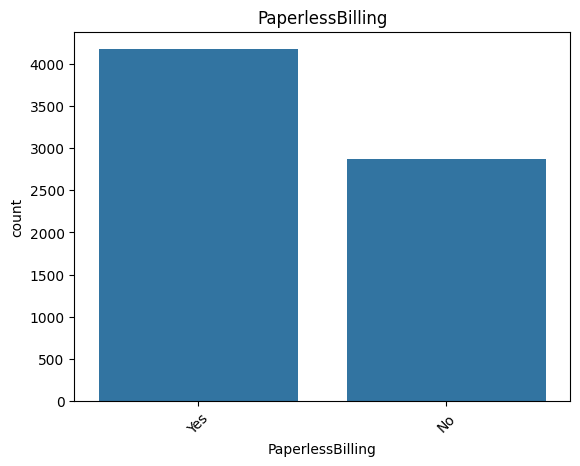

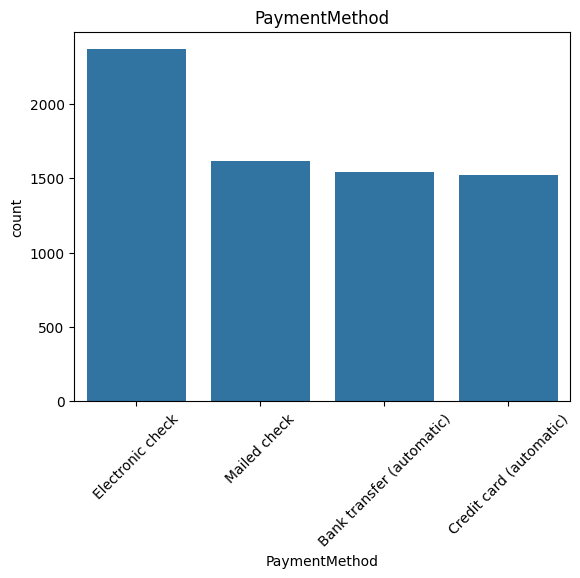

In [21]:
# How many times each category is repeated
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    sns.countplot(x=data[col])
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


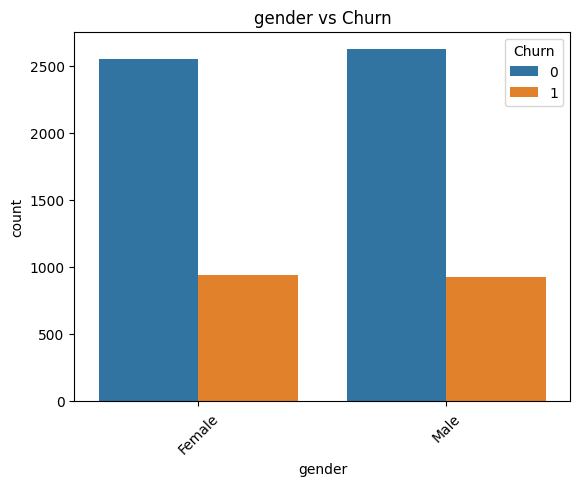

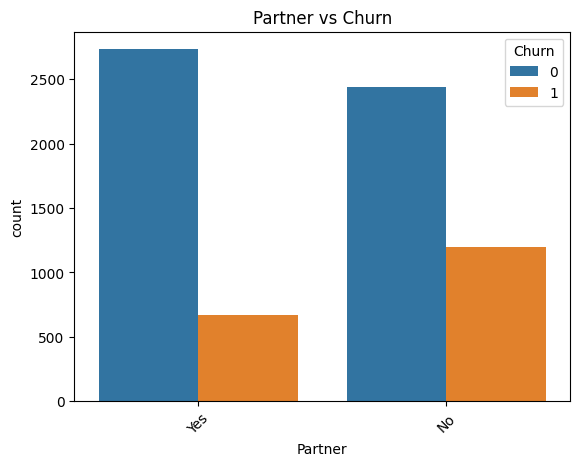

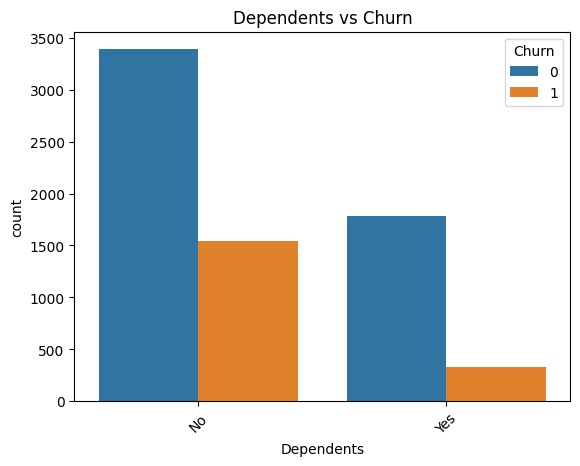

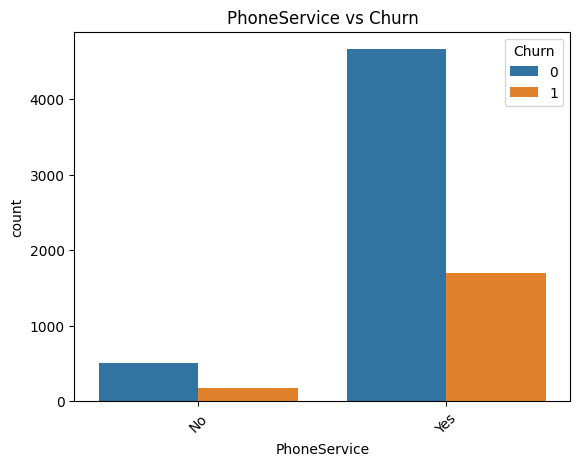

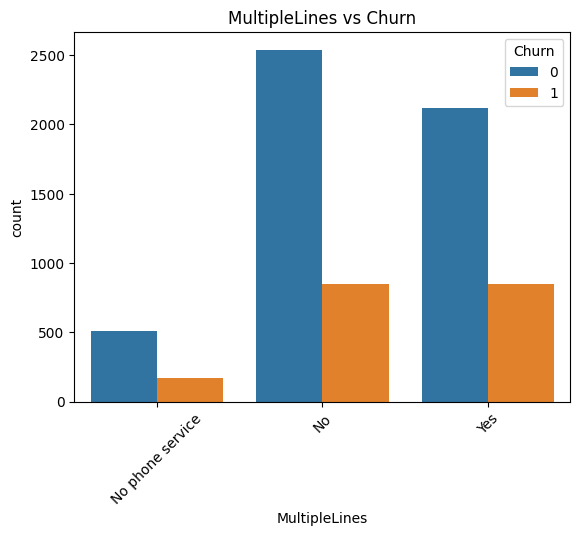

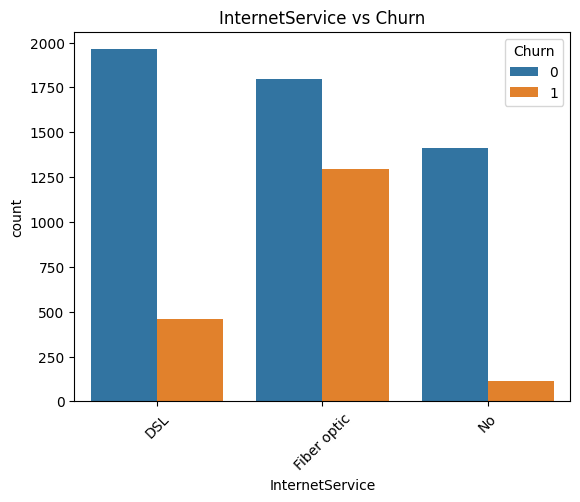

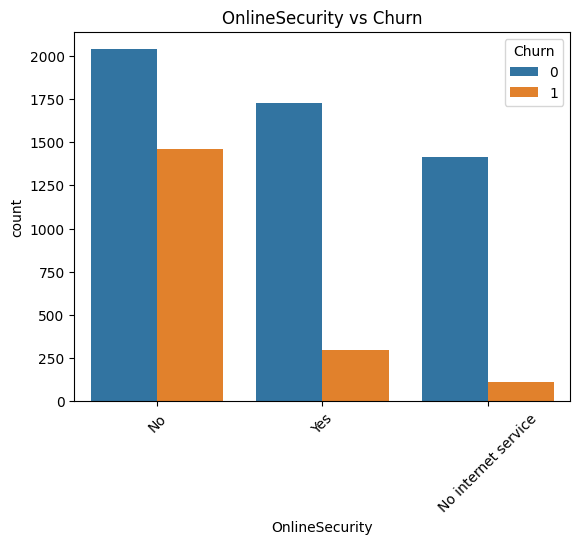

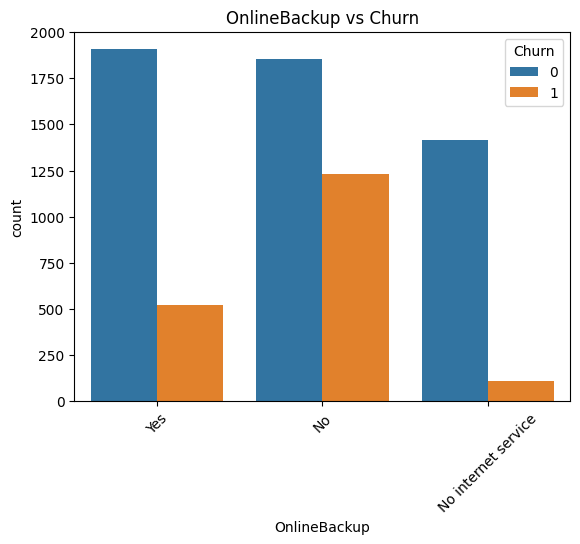

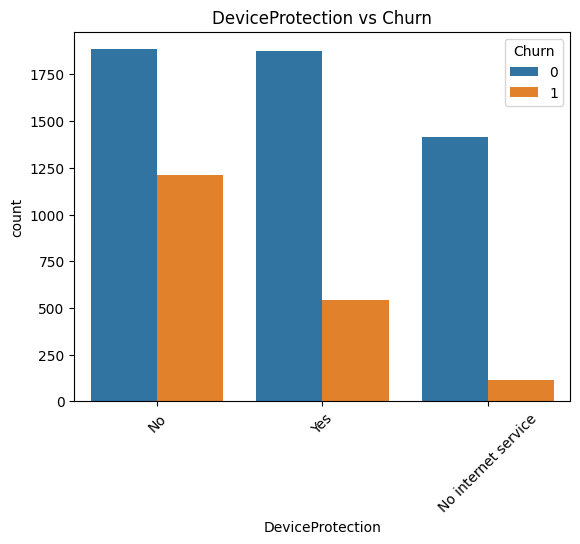

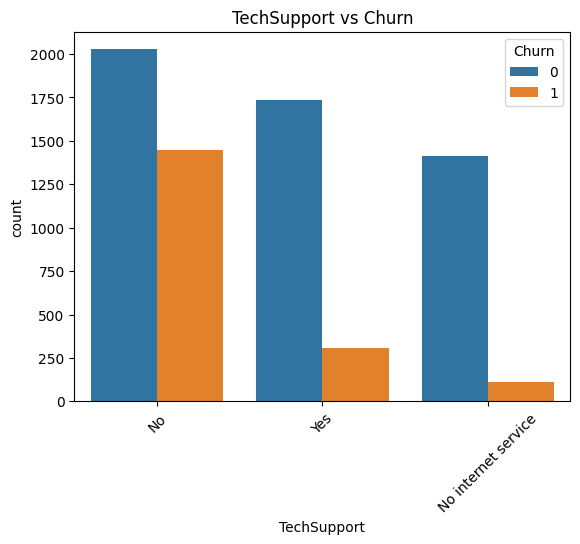

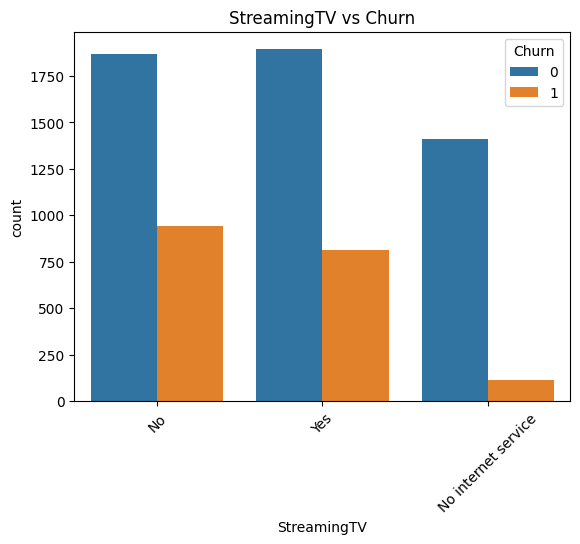

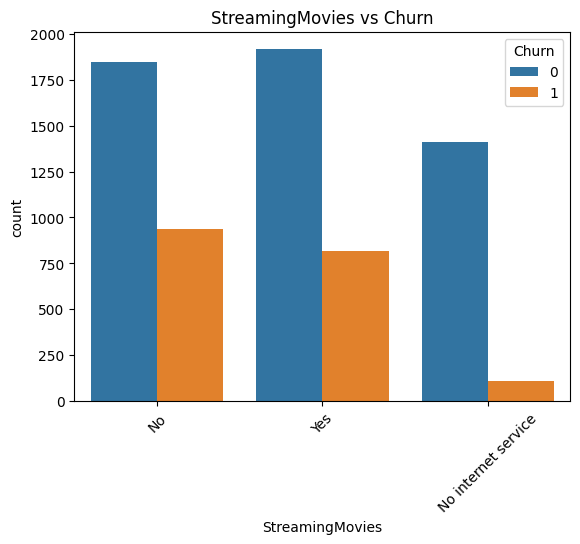

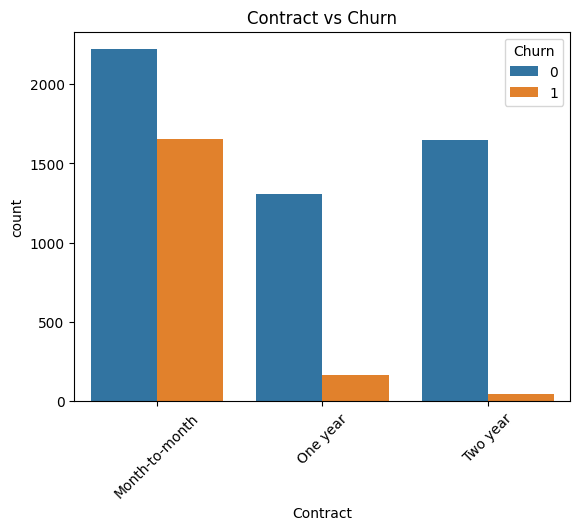

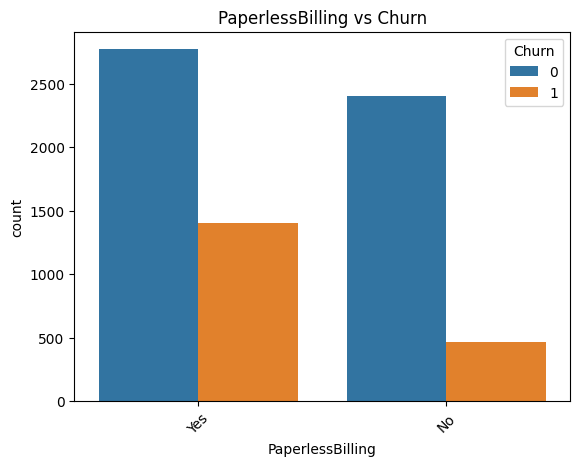

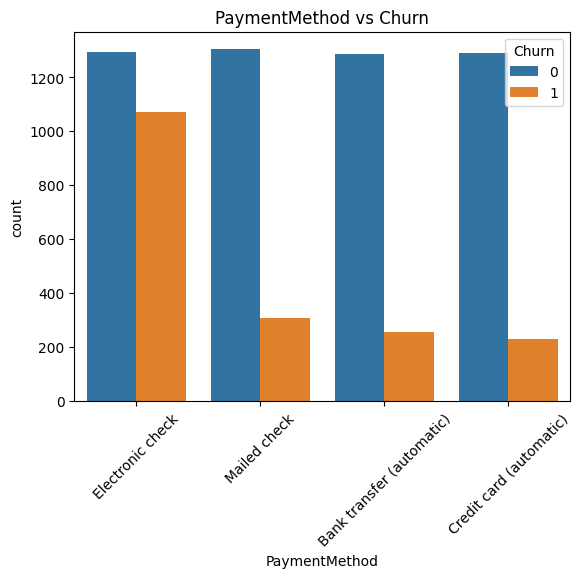

In [22]:
# Understand which features are related to Churn for categorical columns
for col in cat_cols:
    sns.countplot(x=data[col], hue=data['Churn'])
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

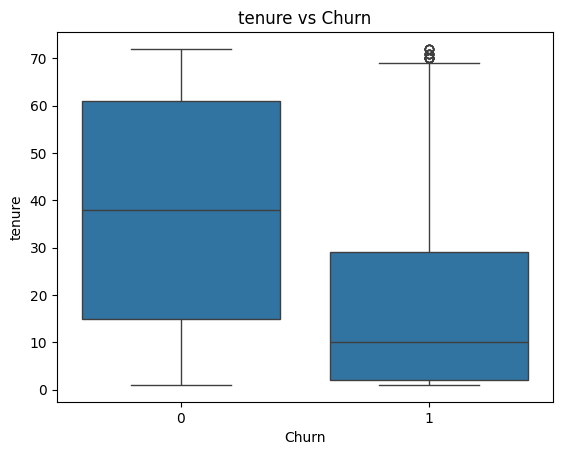

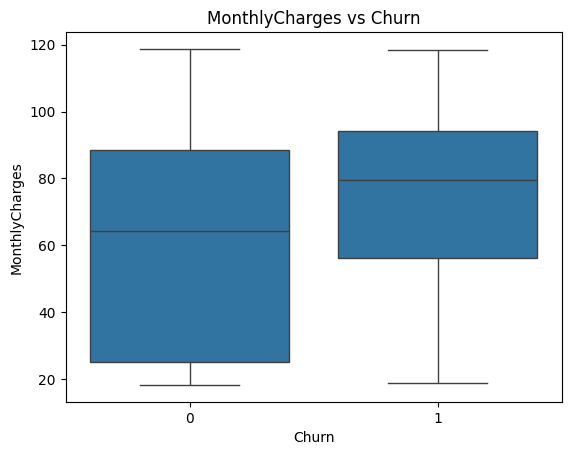

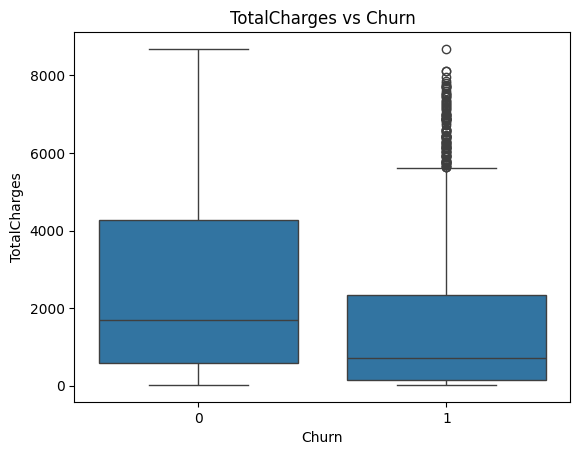

In [23]:
# Understand which features are related to Churn for numerical columns
for col in num_cols:
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f"{col} vs Churn")
    plt.show()

In [24]:
# Key churn-related features:
#    tenure: Customers with shorter tenure are more likely to churn — strong negative correlation with Churn.
#    MonthlyCharges: Higher monthly payments increase churn probability.
#    TotalCharges: Similar to MonthlyCharges — total spending reflects customer loyalty risk.

# Demographic & service-related factors:
#    Partner: Customers without partners churn more — indicates importance of stability/family ties.
#    Dependents: Customers without dependents churn more — similar behavioral pattern as Partner.
#    InternetService: Fiber optic users churn more than DSL users — service type is predictive.
#    OnlineSecurity: Lack of online security strongly linked to higher churn.
#    OnlineBackup: Customers without backups churn more — add-on services reduce churn.
#    DeviceProtection: Missing device protection increases churn likelihood.
#    TechSupport: No tech support → higher churn — shows value of support services.
#    Contract: Month-to-month contracts have highest churn — strongest categorical predictor.
#    PaperlessBilling: Paperless billing linked with higher churn — may indicate lower engagement.
#    PaymentMethod: Electronic check users churn more — payment convenience affects retention.

# Less important features:
#    gender: No significant churn difference between male/female customers.
#    MultipleLines: Extra phone lines have minimal churn impact.
#    PhoneService: Most with phone service didn’t churn — low influence.
#    StreamingTV / StreamingMovies: Streaming services show weak correlation with churn.

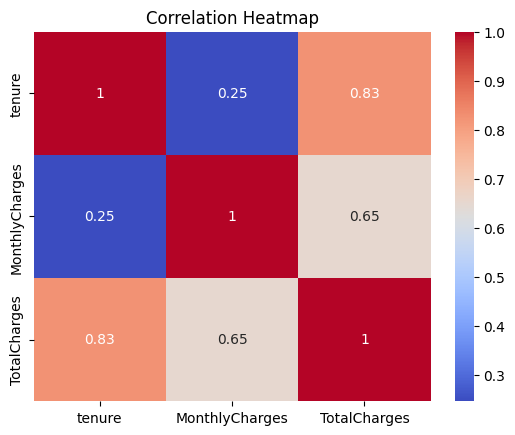

In [25]:
# The relationship between numerical features and Churn
corr = data.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [26]:
ordinal_cols = ['Contract']  # Month-to-month < One year < Two year
cat_cols = [col for col in cat_cols if col not in ordinal_cols]

In [27]:
data['Contract'].nunique

<bound method IndexOpsMixin.nunique of 0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7038          One year
7039          One year
7040    Month-to-month
7041    Month-to-month
7042          Two year
Name: Contract, Length: 7043, dtype: object>

In [28]:
data['Churn'] = data['Churn'].astype('int64')
data.Churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [29]:
# Split features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Train-test split (80/20) with stratified sampling for balanced target distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Function: Build ML Pipeline
def build_pipeline(model_name, num_cols, cat_cols, ordinal_cols):
    
    # Numerical preprocessing (scaling + optional PCA)
    if model_name in ['logistic', 'svc', 'knn']:
        num_transformer = Pipeline([
            ('scaler', MinMaxScaler()),
            ('pca', PCA(n_components=0.95))
        ])
    else:
        num_transformer = Pipeline([
            ('scaler', StandardScaler())
        ])

    # Ordinal and categorical encoding
    ord_transformer = OrdinalEncoder(categories=[['Month-to-month', 'One year', 'Two year']])
    cat_transformer = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
    # Combine all preprocessing steps
    preprocessor = ColumnTransformer([
        ('num', num_transformer, num_cols),
        ('ord', ord_transformer, ordinal_cols),
        ('cat', cat_transformer, cat_cols)
    ])

    # Model definitions with hyperparameter grids
    models = {
        'logistic': (LogisticRegression(max_iter=1000), {
            'model__C': [0.01, 0.1, 1, 10],
            'model__solver': ['lbfgs', 'liblinear']
        }),
        'svc': (SVC(probability=True), {
            'model__C': [0.1, 1, 10],
            'model__kernel': ['rbf', 'linear']
        }),
        'knn': (KNeighborsClassifier(), {
            'model__n_neighbors': [3, 5, 7],
            'model__weights': ['uniform', 'distance']
        }),
        'rf': (RandomForestClassifier(), {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 10, 20]
        }),
        'xgb': (XGBClassifier(eval_metric='logloss'), {
            'model__learning_rate': [0.01, 0.1],
            'model__n_estimators': [100, 200]
        }),
        'voting': (VotingClassifier(estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('svc', SVC(probability=True)),
            ('rf', RandomForestClassifier()),
            ('xgb', XGBClassifier(eval_metric='logloss'))
        ], voting='soft'), {
            'model__voting': ['soft', 'hard'],
            'model__weights': [[1,1,1,1], [2,1,1,1], [1,2,1,1]]
        })
    }

    
    # Select chosen model and its grid
    model, param_grid = models[model_name]

    # Full pipeline (preprocessing + SMOTE + model)
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    # Cross-validation strategy
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # GridSearchCV for hyperparameter tuning
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=skf,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=2
    )

    # Fit model
    grid.fit(X_train, y_train)
    print(f'Best Params of {model_name}:', grid.best_params_)
    print("Best ROC-AUC:", grid.best_score_)

    # Save the best pipeline
    best_pipeline = grid.best_estimator_

    # Export pipeline diagram as HTML
    set_config(display='diagram')
    with open('pipeline.html', 'w',encoding='utf-8') as f:
        f.write(estimator_html_repr(best_pipeline))
    print("Pipeline diagram saved to 'pipeline.html'.")

    return best_pipeline

In [30]:
# List of models to train
models = ['rf', 'logistic', 'svc', 'knn', 'xgb', 'voting']

# Dictionary to store best pipelines
best_pipelines = {}

# Train and save best model for each type
for model in models:
    print(f"Training {model}...")
    best_pipelines[model] = build_pipeline(model, num_cols, cat_cols, ordinal_cols)

Training rf...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params of rf: {'model__max_depth': 10, 'model__n_estimators': 200}
Best ROC-AUC: 0.8388622031144713
Pipeline diagram saved to 'pipeline.html'.
Training logistic...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params of logistic: {'model__C': 10, 'model__solver': 'lbfgs'}
Best ROC-AUC: 0.8438186491876578
Pipeline diagram saved to 'pipeline.html'.
Training svc...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params of svc: {'model__C': 1, 'model__kernel': 'linear'}
Best ROC-AUC: 0.8428927436125431
Pipeline diagram saved to 'pipeline.html'.
Training knn...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Params of knn: {'model__n_neighbors': 7, 'model__weights': 'uniform'}
Best ROC-AUC: 0.7699049736946068
Pipeline diagram saved to 'pipeline.html'.
Training xgb...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Params of xgb: {'model__learn

C:\Users\fab\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning:

One or more of the test scores are non-finite: [0.83982894 0.8428149  0.83975625        nan        nan        nan]



Best Params of voting: {'model__voting': 'soft', 'model__weights': [2, 1, 1, 1]}
Best ROC-AUC: 0.8428149022484117
Pipeline diagram saved to 'pipeline.html'.



🔹 Evaluating RF
Accuracy: 0.7686 | Precision: 0.5524 | Recall: 0.6765 | F1: 0.6082 | ROC-AUC: 0.8357
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1035
           1       0.55      0.68      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409



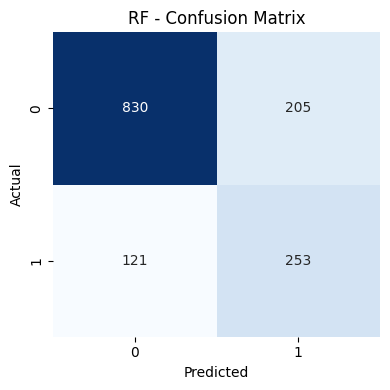

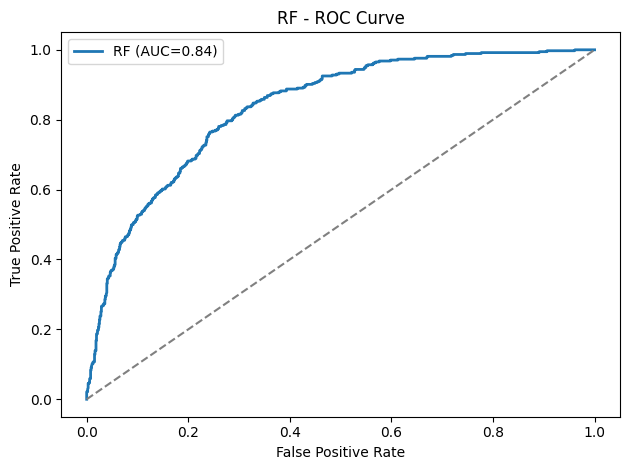


🔹 Evaluating LOGISTIC
Accuracy: 0.7459 | Precision: 0.5140 | Recall: 0.7861 | F1: 0.6216 | ROC-AUC: 0.8392
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



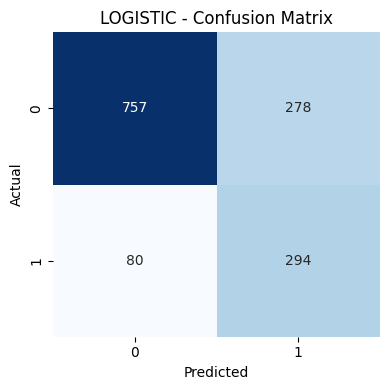

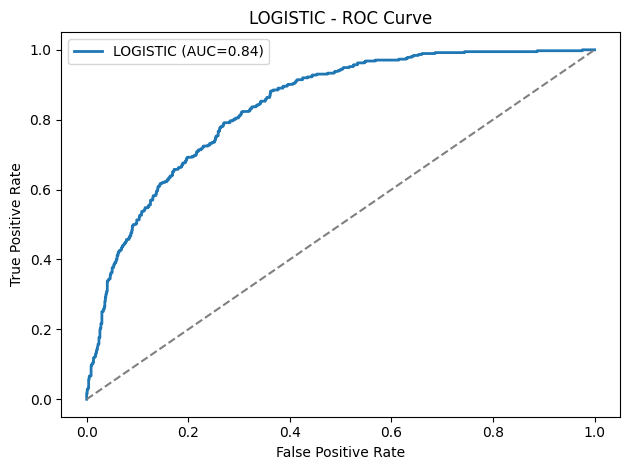


🔹 Evaluating SVC
Accuracy: 0.7275 | Precision: 0.4917 | Recall: 0.7941 | F1: 0.6074 | ROC-AUC: 0.8375
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1035
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.74      1409



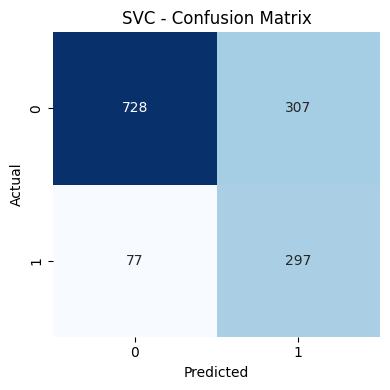

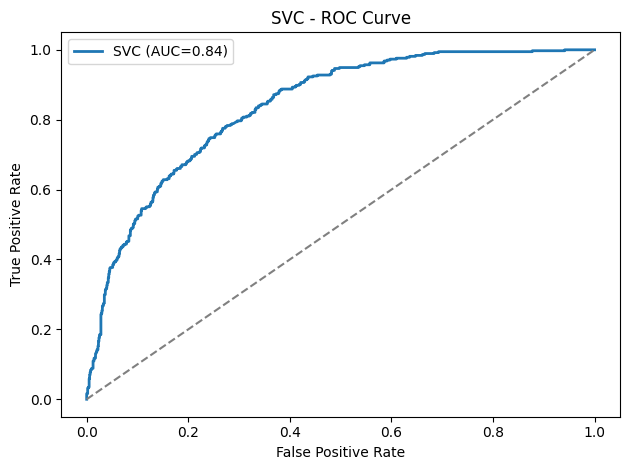


🔹 Evaluating KNN
Accuracy: 0.6806 | Precision: 0.4383 | Recall: 0.7219 | F1: 0.5455 | ROC-AUC: 0.7560
              precision    recall  f1-score   support

           0       0.87      0.67      0.75      1035
           1       0.44      0.72      0.55       374

    accuracy                           0.68      1409
   macro avg       0.65      0.69      0.65      1409
weighted avg       0.75      0.68      0.70      1409



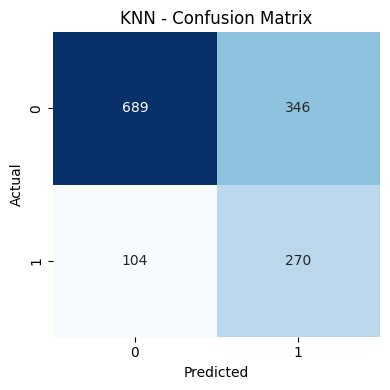

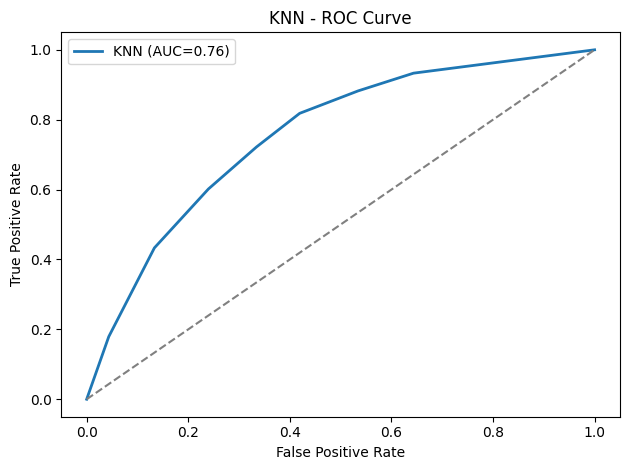


🔹 Evaluating XGB
Accuracy: 0.7715 | Precision: 0.5524 | Recall: 0.7326 | F1: 0.6299 | ROC-AUC: 0.8416
              precision    recall  f1-score   support

           0       0.89      0.79      0.83      1035
           1       0.55      0.73      0.63       374

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409



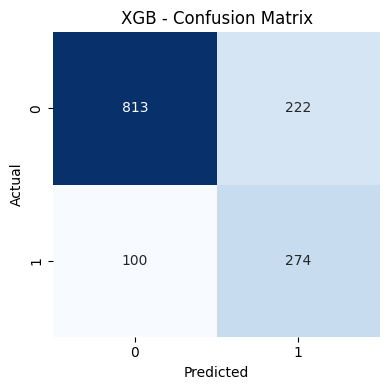

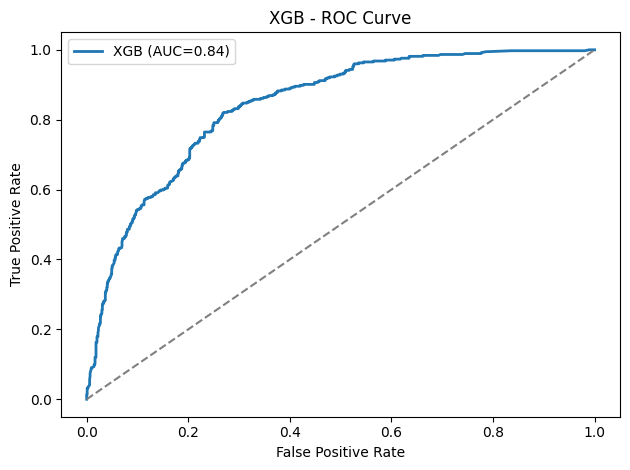


🔹 Evaluating VOTING
Accuracy: 0.7637 | Precision: 0.5419 | Recall: 0.7086 | F1: 0.6141 | ROC-AUC: 0.8367
              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



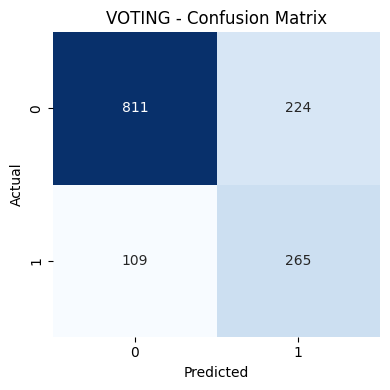

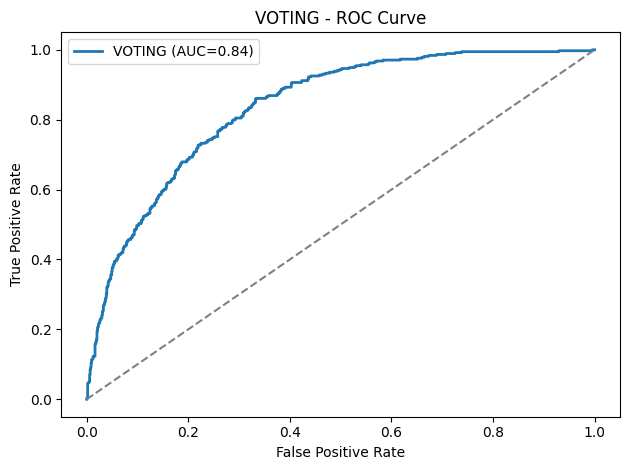


📊 Model Comparison:


,Accuracy,Precision,Recall,F1,ROC-AUC
rf,0.768630,0.552402,0.676471,0.608173,0.835732
logistic,0.745919,0.513986,0.786096,0.621564,0.839187
svc,0.727466,0.491722,0.794118,0.607362,0.837500
knn,0.680625,0.438312,0.721925,0.545455,0.755997
xgb,0.771469,0.552419,0.732620,0.629885,0.841595
voting,0.763662,0.541922,0.708556,0.614137,0.836679


<Figure size 800x500 with 0 Axes>

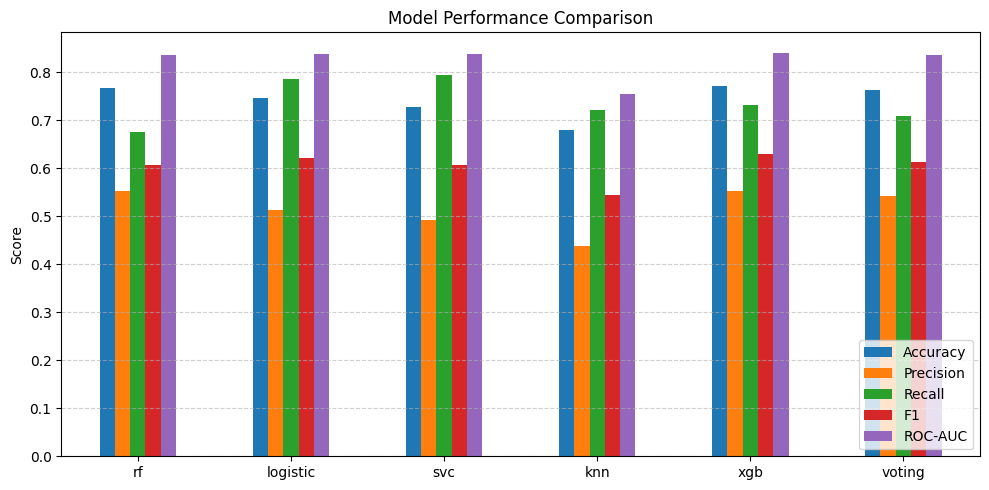

In [31]:
# Dict to store model results
results = {}

# Evaluate all models
for name, model in best_pipelines.items():
    print(f'\n Evaluating {name.upper()}')

    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_proba)

    # Save metrics
    results[name] = [acc, prec, rec, f1, auc_score]

    print(f'Accuracy: {acc: .4f} | Precision: {prec: .4f} | Recall: {rec: .4f} | F1: {f1: .4f} | ROC-AUC: {auc_score: .4f}')
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name.upper()} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name.upper()} (AUC={auc_score: .2f})', linewidth=2)
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.title(f'{name.upper()} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Compare all models in a table (Data frame)
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC']).T
print('\n Model Comparison:')
display(results_df)

# Bar chart comparison
plt.figure(figsize=(8,5))
results_df.plot(kind='bar', figsize=(10,5))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

📊 RF


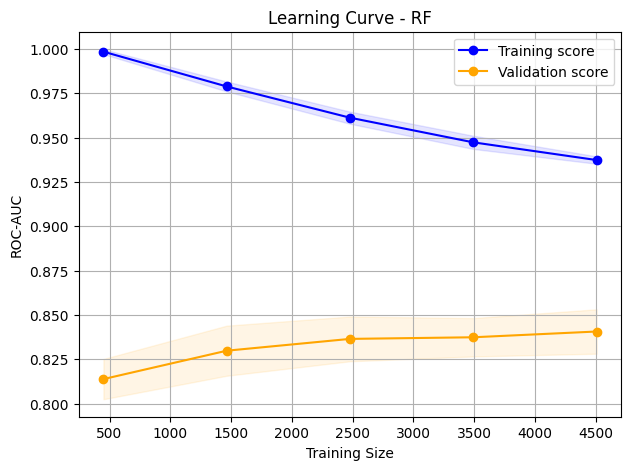

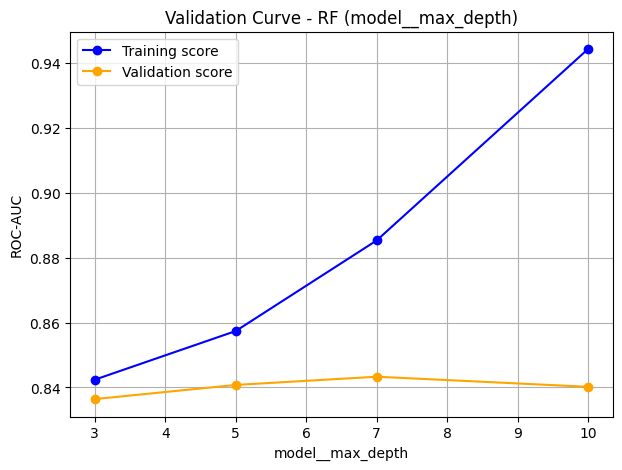

📊 LOGISTIC


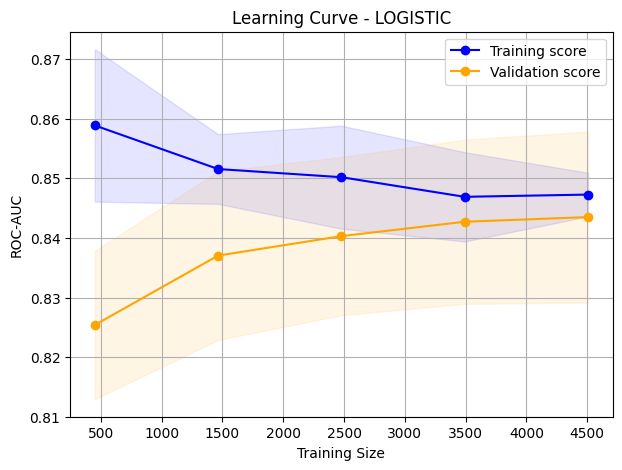

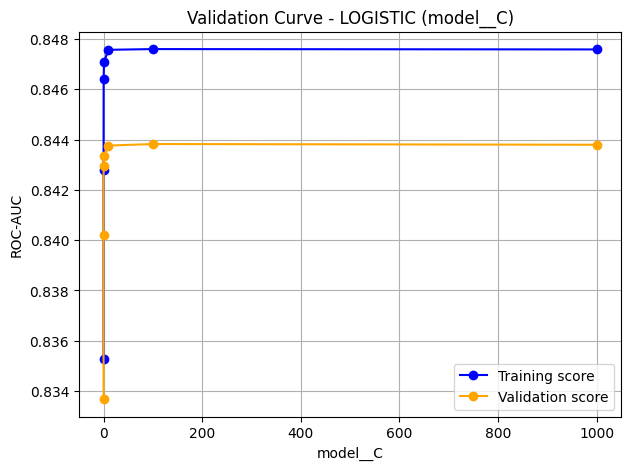

📊 SVC


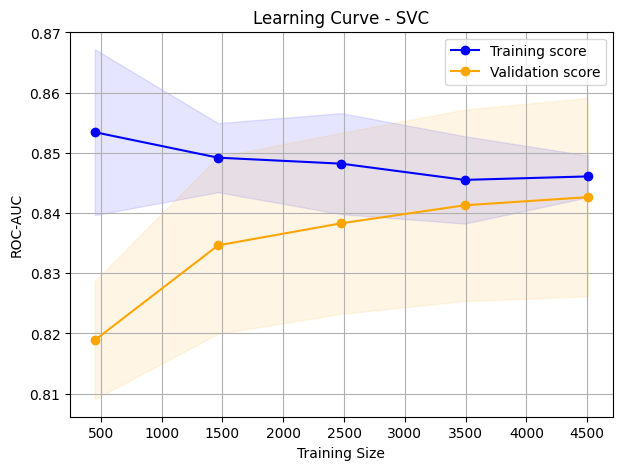

In [ ]:
# Function to visualize overfitting using learning and validation curves
def plot_overfitting(models_dict, X_train, y_train):
    for name, model in models_dict.items():
        print(f'{name.upper()}')

        # ---------- Learning Curve ----------
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train,
            cv=5,
            scoring='roc_auc',
            n_jobs=-1,
            train_sizes=np.linspace(0.1, 1.0, 5),
            shuffle=True,
            random_state=42
        )

        # Plot learning curve
        plt.figure(figsize=(7,5))
        plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='blue', label='Training score')
        plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='orange', label='Validation score')
        plt.fill_between(train_sizes,
                         np.mean(train_scores, axis=1) - np.std(train_scores, axis=1),
                         np.mean(train_scores, axis=1) + np.std(train_scores, axis=1),
                         alpha=0.1, color='blue')
        plt.fill_between(train_sizes,
                         np.mean(test_scores, axis=1) - np.std(test_scores, axis=1),
                         np.mean(test_scores, axis=1) + np.std(test_scores, axis=1),
                         alpha=0.1, color='orange')
        plt.title(f'Learning Curve - {name.upper()}')
        plt.xlabel('Training Size')
        plt.ylabel('ROC-AUC')
        plt.grid(True)
        plt.legend()
        plt.show()

        # ---------- Validation Curve (single models only) ----------
        if name != 'voting':
            param_name = None
            param_range = None

            # Select parameter for validation curve
            if name == 'rf':
                param_name, param_range = "model__max_depth", [3, 5, 7, 10, None]
            elif name == 'xgb':
                param_name, param_range = "model__n_estimators", [50, 100, 150, 200]
            elif name == 'logistic':
                param_name, param_range = "model__C", np.logspace(-3, 3, 7)
            elif name == 'svc':
                param_name, param_range = "model__C", np.logspace(-3, 3, 7)
            elif name == 'knn':
                param_name, param_range = "model__n_neighbors", [3, 5, 7, 9]

            # Plot validation curve
            if param_name and param_range is not None:
                train_scores_v, test_scores_v = validation_curve(
                    model, X_train, y_train,
                    param_name=param_name,
                    param_range=param_range,
                    cv=3,
                    scoring='roc_auc',
                    n_jobs=-1
                )
                plt.figure(figsize=(7,5))
                plt.plot(param_range, np.mean(train_scores_v, axis=1), 'o-', color='blue', label='Training score')
                plt.plot(param_range, np.mean(test_scores_v, axis=1), 'o-', color='orange', label='Validation score')
                plt.title(f'Validation Curve - {name.upper()} ({param_name})')
                plt.xlabel(param_name)
                plt.ylabel('ROC-AUC')
                plt.grid(True)
                plt.legend()
                plt.show()
        else:
            print(f'Skipping Validation Curve for {name.upper()} (Voting)')

# Run function
plot_overfitting(best_pipelines, X_train, y_train)

In [ ]:
# Feature Importance
for name in ['rf', 'xgb']:
    model = best_pipelines[name].named_steps['model']
    fi = model.feature_importances_
    
    feature_names = X.columns
    
    plt.figure(figsize=(10,5))
    plt.bar(feature_names, fi)
    plt.title(f'Feature Importance - {name.upper()}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
